Date
2016-10-26    799.07
2016-10-27    795.35
2016-10-28    795.37
2016-10-31    784.54
2016-11-01    783.61
Name: Close, dtype: float64


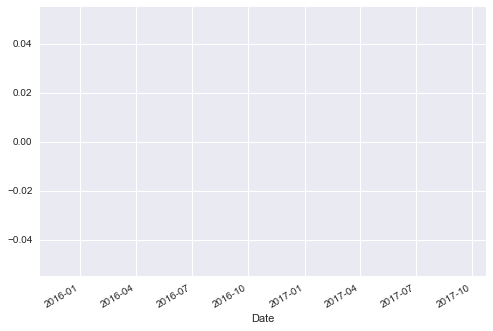

In [26]:
#This is a terrible set of examples
%matplotlib inline
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')

goog = goog['Close']

print(goog.head())

# goog.plot(alpha=0.5, style='-')
# goog.resample('W').mean().plot(style=':')
# goog.asfreq('M').plot(style='--');

# plt.legend(['input', 'resample', 'asfreq'],
#            loc='upper left');

# fig, ax = plt.subplots(2, sharex = True)
# data = goog.iloc[:10]

# data.asfreq('D').plot(ax=ax[0], marker='o')
# data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
# data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
# ax[1].legend(['back-fill', 'forward-fill'])

# #Make plots
# fig, ax = plt.subplots(3, sharey=True)

# #Add frequency
goog = goog.asfreq('D', method='pad')

# #Add plots
# goog.plot(ax=ax[0])
# goog.shift(900).plot(ax=ax[1])
# goog.tshift(900).plot(ax=ax[2]);

# #Legends and annotate
# local_max = pd.to_datetime('2007-11-05')
# offset = pd.Timedelta(900, 'D')

# ax[0].legend(['input'], loc=2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color = 'red')
# ax[0].axvline(local_max, alpha=0.3, color = 'red')

# ax[1].legend(['shift'], loc=2)
# ax[1].get_xticklabels()[4].set(weight='heavy', color = 'red')
# ax[1].axvline(local_max + offset, alpha=0.3, color='red')

# ax[2].legend(['tshift(900)'], loc=2)
# ax[2].get_xticklabels()[1].set(weight='heavy', color = 'red')
# ax[2].axvline(local_max + offset, alpha=0.3, color='red')

#Calculate ROI
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()

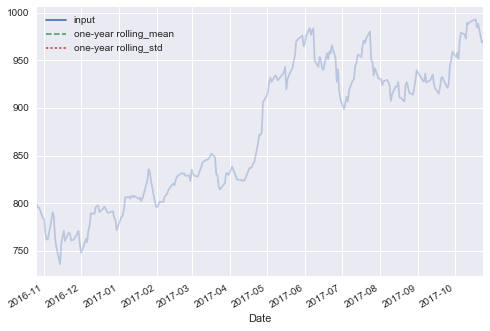

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')

goog = goog['Close']

rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-year rolling_std' : rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)